In [7]:
import pandas as pd
import chardet
import plotly.express as px
# import matploatlib as matlib
# ! pip install jupyterlab anywidget

In [9]:

with open("superstore.csv", 'rb') as f:
    result = chardet.detect(f.read())
print(result)
df = pd.read_csv("Superstore.csv", encoding=result['encoding'])

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show code</button>''', raw=True)

Show code

### ✅PHASE 1: Set Up and Understand the Data

In [52]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [53]:
df.shape

(9994, 20)

In [70]:
# df.drop(['Postal Code'],axis=1, inplace = True)

In [55]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [56]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [57]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


In [58]:
print(df.duplicated().sum())

0


### ✅PHASE 2: Exploratory Data Analysis (EDA)

In [59]:
# here we find some insights such as total saels, total profit, total discount give, category wise profit, sales, city wise sales profit

In [60]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")


Total Sales: $2,297,200.86


In [61]:
# profit after dicount
total_profits = df['Profit'].sum()
print(f"total profits: ${total_profits:,.2f}")

total profits: $286,397.02


In [62]:
average_discount = df['Discount'].mean()

print(f"average discount : {average_discount*100:,.4f}%")

average discount : 15.6203%


In [63]:
# now we calculate discount given in $
print(total_sales)
spent_on_discount = (2297200.8603 * 15.62)/84.38
print(f"spent_on_discount : ${spent_on_discount:,.2f}")

2297200.8603
spent_on_discount : $425,246.24


In [64]:
total_quantity = df['Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity:,} Units")

Total Quantity Sold: 37,873 Units


In [65]:
# now let's find  total user and unique user 

In [66]:

unique_customers = df['Customer ID'].nunique()
print(f"Number of Unique Customers: {unique_customers}")

unique_orders = df['Order ID'].nunique()
print(f"Number of Unique Orders: {unique_orders}")


Number of Unique Customers: 793
Number of Unique Orders: 5009


In [67]:
# analize region wise......

In [68]:
df['Region'].nunique()

4

In [69]:
# rigion wise sales

region_stats = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)
print(region_stats)

# # By Country
# region_stats = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)
# print(region_stats)

               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


In [29]:
 ## convert normal dataframe to long bcz graoh only read this type of format.

df_long = df.melt(id_vars=['Region'], # id_vars used to define column which is remain same       
                  value_vars=['Profit', 'Sales'],   ## value_vars used to unpivot columns
                  var_name='metric',              ## this will create new column only for this plot 
                  value_name='Amount')         ## name of new column which hold numeric values

color_map = {
    'Profit': 'green',
    'Sales': 'blue'
}


fig = px.histogram(df_long,  
             x='Region',    # column for x axis
             y='Amount',    # column for y-axia
             color='metric',  # import crated column for color
             barmode='group',   ## barmode group or stack
             title='Profits and Sales by Region',   
             color_discrete_map=color_map)     
fig.update_layout(
    height=600,
    width=1300  # or larger if needed
)

fig.show()

In [71]:
### category wise sales and profits

category_stats = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)
print(category_stats)


                                    Sales      Profit
Category        Sub-Category                         
Technology      Phones        330007.0540  44515.7306
Furniture       Chairs        328449.1030  26590.1663
Office Supplies Storage       223843.6080  21278.8264
Furniture       Tables        206965.5320 -17725.4811
Office Supplies Binders       203412.7330  30221.7633
Technology      Machines      189238.6310   3384.7569
                Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
Furniture       Bookcases     114879.9963  -3472.5560
Office Supplies Appliances    107532.1610  18138.0054
Furniture       Furnishings    91705.1640  13059.1436
Office Supplies Paper          78479.2060  34053.5693
                Supplies       46673.5380  -1189.0995
                Art            27118.7920   6527.7870
                Envelopes      16476.4020   6964.1767
                Labels         12486.3120   5546.2540
                Fasteners   

In [72]:
nbins = len(df['Sub-Category'].unique())
nbins

17

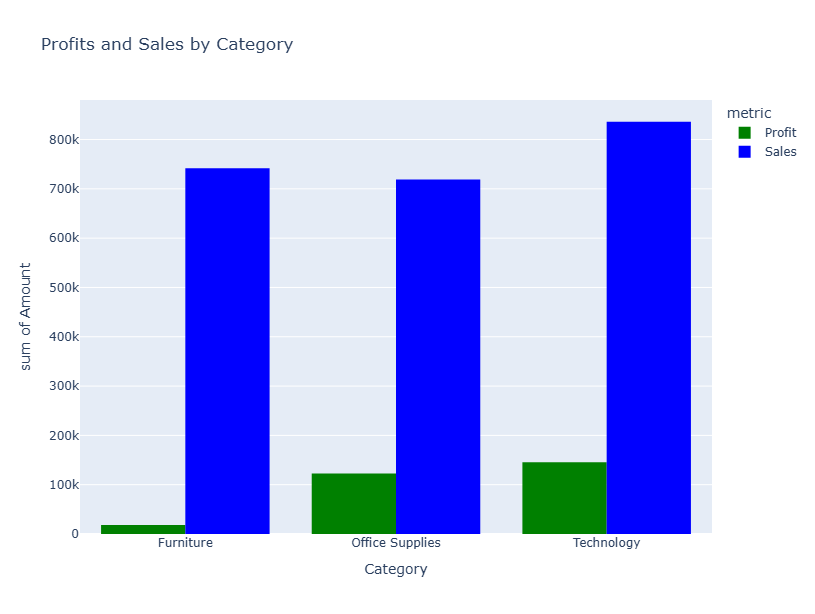

In [127]:
df_convert = df.melt(id_vars=['Category'],
                     value_vars=['Profit', 'Sales'],   
                      var_name='metric',            
                      value_name='Amount')
color_map = {
    'Profit': 'green',
    'Sales': 'blue'
}
fig = px.histogram(df_convert,  
             x='Category',    # column for x axis
             y='Amount',    # column for y-axia
             color='metric',  # import crated column for color
             barmode='group',   ## barmode group or stack
             title='Profits and Sales by Category',
            color_discrete_map=color_map)
fig.update_layout(
    height=600,
    width=1300  # or larger if needed
)
# fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.show()
                   

In [128]:
## Sub-Category wise profit percentage....................
subcat = df.groupby(['Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()  # here reset_index is very imp, bcz sub_cat is not dataset column so reset index provide index and later it considered as column 


subcat['Profit %'] = (subcat['Profit'] / subcat['Sales']) * 100

subcat_formatted = subcat.copy()
subcat_formatted = subcat_formatted.sort_values(by='Profit %', ascending=False)
subcat_formatted['Profit %'] = subcat_formatted['Profit %'].map('{:,.2f}'.format)
subcat_formatted

,Sub-Category,Sales,Profit,Profit %
10,Labels,12486.3120,5546.2540,44.42
12,Paper,78479.2060,34053.5693,43.39
7,Envelopes,16476.4020,6964.1767,42.27
6,Copiers,149528.0300,55617.8249,37.20
8,Fasteners,3024.2800,949.5182,31.40
0,Accessories,167380.3180,41936.6357,25.05
2,Art,27118.7920,6527.7870,24.07
1,Appliances,107532.1610,18138.0054,16.87
3,Binders,203412.7330,30221.7633,14.86
9,Furnishings,91705.1640,13059.1436,14.24


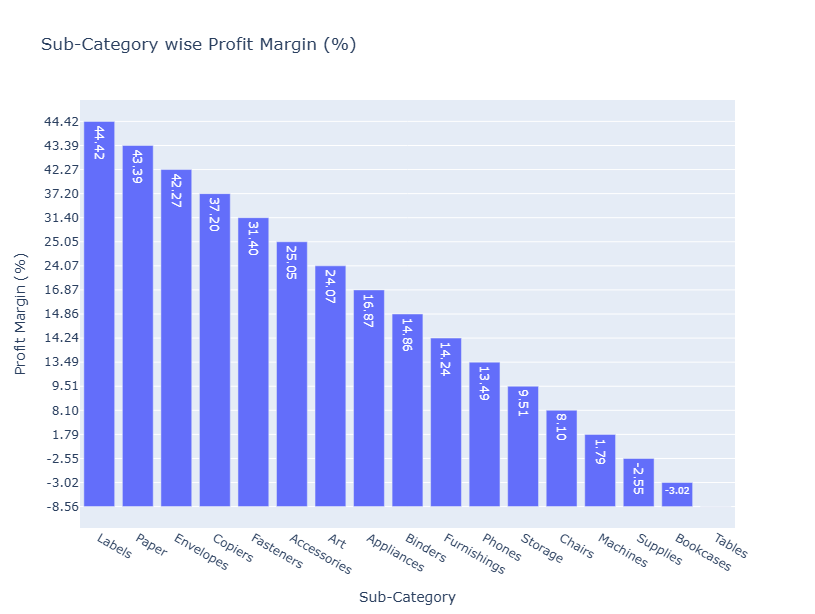

In [129]:
fig = px.bar(subcat_formatted,  
             y='Profit %',
             x='Sub-Category',   
             title='Sub-Category wise Profit Margin (%)',
             text='Profit %')  
        
fig.update_layout(
    height=600,
    width=1600,
    xaxis_tickangle=30,
    yaxis_title='Profit Margin (%)',
    yaxis={'categoryorder': 'total descending'}
)
fig.show()

In [130]:
## by Ship mode, profit and sales

df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [131]:
shipmode_wise = df.groupby(['Ship Mode']).agg({'Sales': 'sum', 'Profit': 'sum'})

# converted scientific format to string for better represantation......
shipmode_wise_formatted = shipmode_wise.copy()
shipmode_wise_formatted['Sales'] = shipmode_wise_formatted['Sales'].map('{:,.2f}'.format)
shipmode_wise_formatted['Profit'] = shipmode_wise_formatted['Profit'].map('{:,.2f}'.format)

print(shipmode_wise_formatted)


                       Sales      Profit
Ship Mode                               
First Class       351,428.42   48,969.84
Same Day          128,363.12   15,891.76
Second Class      459,193.57   57,446.64
Standard Class  1,358,215.74  164,088.79


In [132]:
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [133]:
customer_segment_wise = df.groupby(['Segment']).agg({'Sales': 'sum', 'Profit': 'sum'})
print(customer_segment_wise)

                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


In [ ]:
df.head()

### ✅Time Series Analysis

In [134]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
    
df['Order Date'].dtype # ir should 'ns'

dtype('<M8[ns]')

In [135]:
### Month wise profit analysis

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()  # e.g., January
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%b')
df['YearMonth'] = pd.to_datetime(df['Year-Month'], format='%Y-%b')

# here we sort month with highest profit
trends = df.groupby(['YearMonth','Year-Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
    # .sort_values(by='Profit', ascending=False)


monthly_trends = trends.copy()
# monthly_trends['Profit'] =  monthly_trends['Profit'].map('{:,.2f}'.format)
monthly_trends

,YearMonth,Year-Month,Sales,Profit
0,2014-01-01,2014-Jan,14236.8950,2450.1907
1,2014-02-01,2014-Feb,4519.8920,862.3084
2,2014-03-01,2014-Mar,55691.0090,498.7299
3,2014-04-01,2014-Apr,28295.3450,3488.8352
4,2014-05-01,2014-May,23648.2870,2738.7096
5,2014-06-01,2014-Jun,34595.1276,4976.5244
6,2014-07-01,2014-Jul,33946.3930,-841.4826
7,2014-08-01,2014-Aug,27909.4685,5318.1050
8,2014-09-01,2014-Sep,81777.3508,8328.0994
9,2014-10-01,2014-Oct,31453.3930,3448.2573


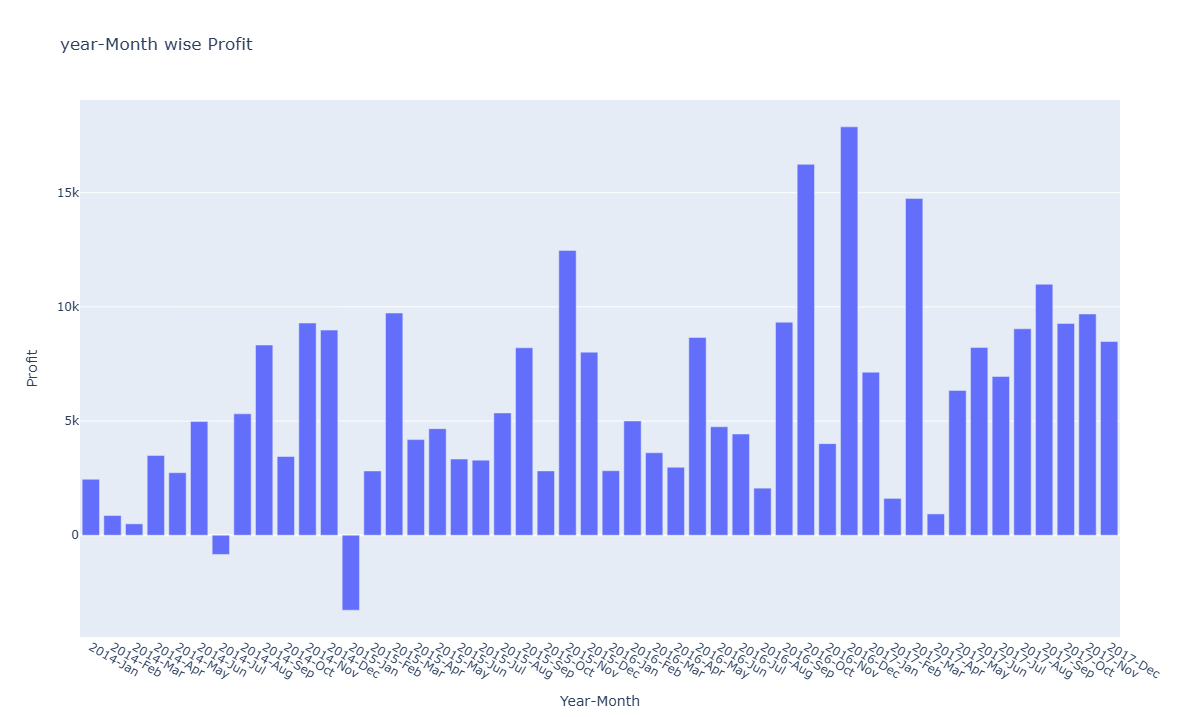

In [136]:
fig = px.bar(monthly_trends,  
             y='Profit',
             x='Year-Month',   
             title='year-Month wise Profit',
             )
fig.update_layout(
    height=700,
    width=1500,
    xaxis_tickangle=30,
    # yaxis_title='Profit Margin (%)',
    yaxis={'categoryorder': 'trace'}

)
fig.show()

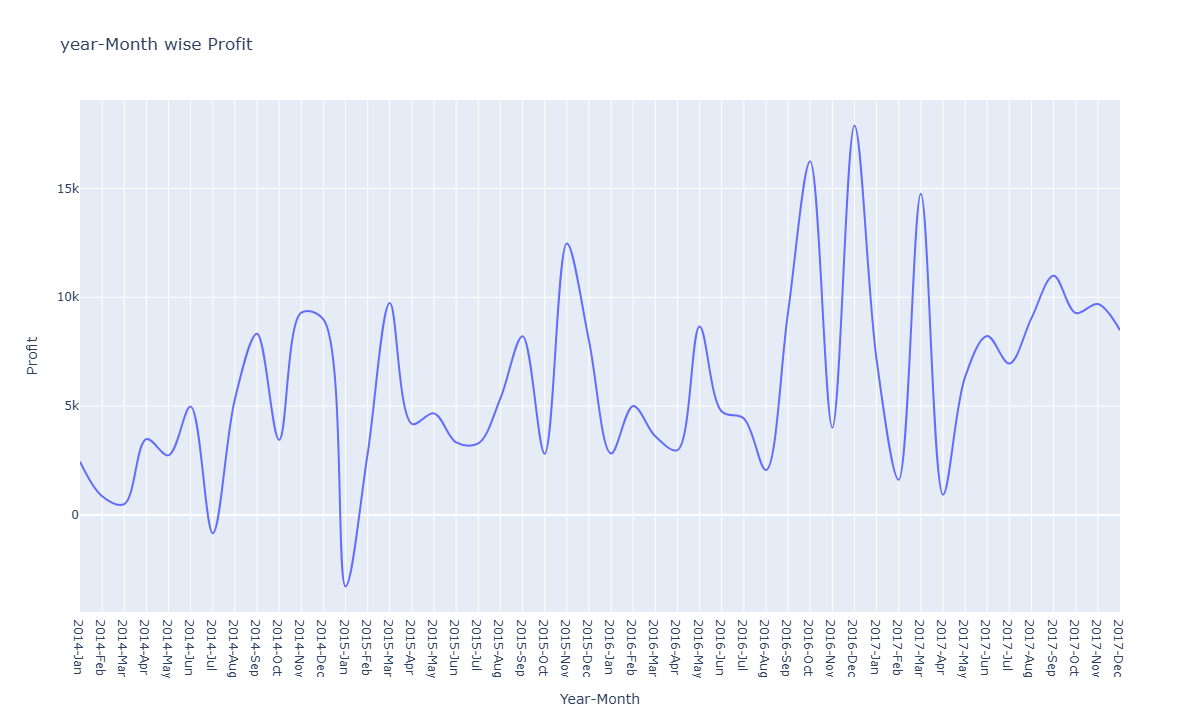

In [137]:
fig = px.line(monthly_trends,  
             y='Profit',
             x='Year-Month',   
             title='year-Month wise Profit'
              ,render_mode="svg",line_shape="spline",)  
fig.update_layout(
    height=700,
    width=3000,
)
fig.show()


In [ ]:
# fig = px.ecdf(monthly_trends,  
#              y='Profit',
#              x='Year-Month',   
#              title='year-Month wise Profit'
#               ,render_mode="svg")  
# fig.update_layout(
#     height=700,
#     width=1000,
# )
# fig.show()

In [138]:
## year wise trand analysis

yearly_trands = df.groupby(['Year']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index().sort_values('Profit', ascending=False)
print(yearly_trands)

   Year        Sales      Profit
3  2017  733215.2552  93439.2696
2  2016  609205.5980  81795.1743
1  2015  470532.5090  61618.6037
0  2014  484247.4981  49543.9741


In [ ]:
# profit_analysis = df.groupby(['Category', 'Sub-Category']).agg({
#     'Sales': 'sum',
#     'Profit': 'sum',
#     'Discount': 'mean'
# }).reset_index()

# # Calculate Profit Margin
# profit_analysis['Profit Margin (%)'] = (profit_analysis['Profit'] / profit_analysis['Sales']) * 100

# # Format as styled table
# styled_table = (
#     profit_analysis.sort_values('Profit Margin (%)', ascending=True).style.format({
#         'Sales': '${:,.2f}',
#         'Profit': '${:,.2f}',
#         'Discount': '{:.2%}',
#         'Profit Margin (%)': '{:.2f}%'
#     }))
# styled_table

### Yearly Order analysis

In [103]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
    
df['Order Date'].dtype # ir should 'ns'

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()  # e.g., January
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%b')
df['date'] = pd.to_datetime(df['Year-Month'], format='%Y-%b')

# here we sort month with highest profit
# trends = df.groupby(['date','Year-Month']).agg({'Order ID': 'count'}).reset_index()
    # .sort_values(by='Profit', ascending=False)
trends = df.groupby(['date','Year','Month']).agg({'Order ID': 'count'}).reset_index()
    # .sort_values(by=['Year','Month'], ascending=True)

# monthly_trends = trends.copy()
# monthly_trends['Profit'] =  monthly_trends['Profit'].map('{:,.2f}'.format)
monthly_trends

,date,Year,Month,Order ID
0,2014-01-01,2014,January,79
1,2014-02-01,2014,February,46
2,2014-03-01,2014,March,157
3,2014-04-01,2014,April,135
4,2014-05-01,2014,May,122
5,2014-06-01,2014,June,135
6,2014-07-01,2014,July,143
7,2014-08-01,2014,August,153
8,2014-09-01,2014,September,268
9,2014-10-01,2014,October,159


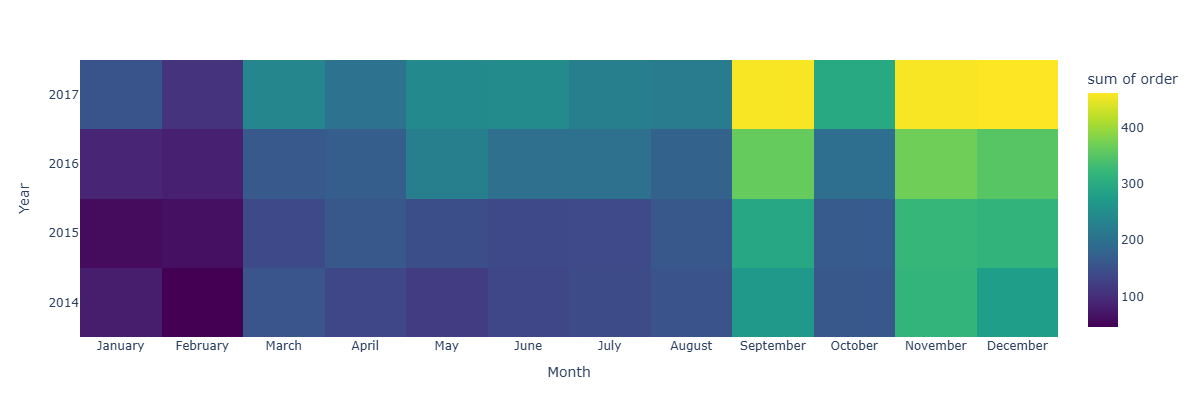

In [109]:
heatmap_data = monthly_trends.pivot(index='Year', columns='Month', values='Order ID')
heatmap_data = heatmap_data.reset_index().melt(id_vars='Year', var_name='Month', value_name='order')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

Year_order = ['2014','2015','2016','2017']

fig = px.density_heatmap(heatmap_data, x='Month', y='Year', z='order', 
                         color_continuous_scale='Viridis',
                        category_orders={'Month': month_order, 'Year':Year_order},)

fig.update_layout(
    height=400,
    width=1400,

)
fig.show()

#### What we Get
here we can see that every year November, december, september has highest order       
january has lowest order rate every year       
here we get hidden pattern for number of order.   

In [ ]:
df['date_difference'] = df['Ship Date'] - df['Order Date']




In [142]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Average Delivery Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

average_delivery_time = df['Average Delivery Time (Days)'].mean()
print(f"Average Delivery Time : {average_delivery_time:,.2f} Days")

delivery_time = df.groupby(['Year-Month']).agg({'Average Delivery Time (Days)':'mean'}).reset_index()
delivery_time


Average Delivery Time : 3.96 Days


,Year-Month,Average Delivery Time (Days)
0,2014-Apr,4.051852
1,2014-Aug,4.045752
2,2014-Dec,3.960432
3,2014-Feb,4.173913
4,2014-Jan,4.164557
5,2014-Jul,3.839161
6,2014-Jun,4.177778
7,2014-Mar,3.974522
8,2014-May,3.803279
9,2014-Nov,4.261006


In [126]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Year-Month,date,Delivery Time (Days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,November,2016-Nov,2016-11-01,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,November,2016-Nov,2016-11-01,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,June,2016-Jun,2016-06-01,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,October,2015-Oct,2015-10-01,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,October,2015-Oct,2015-10-01,7
